The goal of this notebook is to perform Exploratory Data Analysis(EDA) on a given bank dataset.

1 )Formulate a particular question that might be interesting to answer by exploring this dataset (in a markdown cell).

2) Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (in a markdown cell).

3) Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (in a markdown cell).

4)Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).
Make sure your conclusions are related to the question you have formulated.

In [2]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./bank.csv')
#importing my data

# 1) Data Exploration

In [4]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


What 3 columns effect a person from subscribing or not the most

# 1.1) Quick examination of numerical attributes

In [6]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Age is missing 12 values.

Max number of pdays is 864 which menas that all clients were contacted. If the max number was 999 then at least one client wasnt previously contacted.

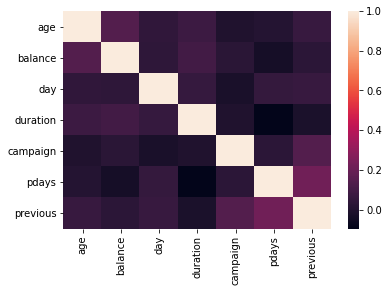

In [7]:
#correlation matrix
sns.heatmap(df.corr());

In the heat map there is no correlation above 0.4.

Age and Balance all have a similar correlation with how long the customer stays on the phone.

Age and Balance have a correlation between them also of around 0.3

Pdays and Previous days have the highest correlation.

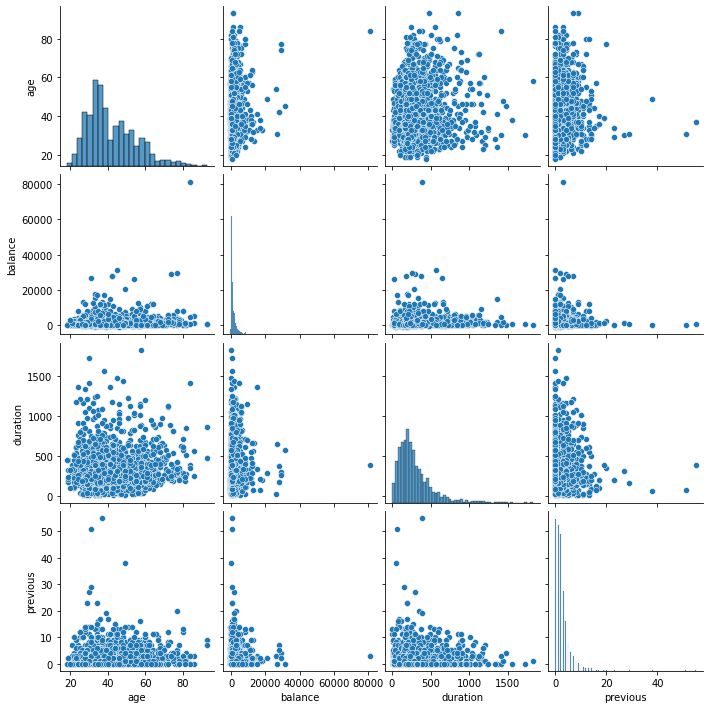

In [8]:
sns.pairplot(data=df[['age','balance','duration','previous']].dropna())
plt.show()

From reviewing the above numerical data it can be seen that people in their 20 - 40s are the most called age group. These are also the age group which tend to have a longer duration of calls and it is also visible that this is where the highest average of account balance is.

Maybe this age group is the most likely to subscribe? We will find out 

The Categorical data can also be viewed to get a better idea of the data.

# 1.2) Quick Examination of Categorical Attributes

In [9]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

We can gain an understanding of what jobs people have and the employment rate of the dataset



In [10]:
df['job'].count()

1990

We are missing 10 job values from the data

In [11]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

Education can also may help us provide insight into if the person subscribes or not

In [12]:
df['education'].count()

1896

Missing large amount of education data

In [13]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

There is a 50 / 50 ratio in our dataset of the amount of people who subscribed and who didnt

# 2) Distribution Analysis 

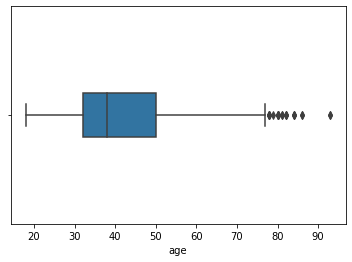

In [14]:
sns.boxplot(x=df['age'], width=0.2)
plt.show()

From this box plot we can see that the median age is around 37/38  while most people are between the age of 30/50. There area  few outliers when the age reaches near 90 years old. The main target audience could be for people looking to save money for their future

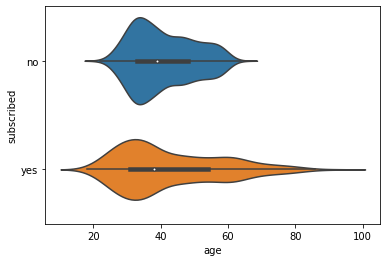

In [15]:
sns.violinplot(data=df, x='age', y='subscribed' )
plt.show()

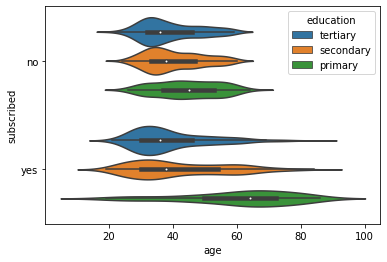

In [16]:
sns.violinplot(data=df, x='age', y='subscribed', hue ='education' )
plt.show()

Here we can see the ages of the groups who have subscribed along with their education. Its interesting to see that people with only primary education are of an older age and they are subscribing.

it could be said that education has an effect on what kind of person subscribes.

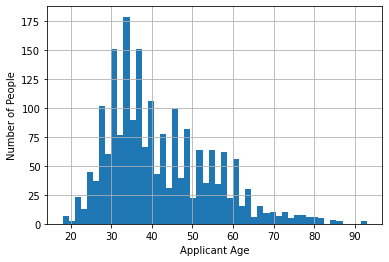

In [18]:
df['age'].hist(bins=50)
plt.xlabel('Applicant Age')
plt.ylabel('Number of People')
plt.show()

In [22]:
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for Loan:') 
print(frequency_table)

Frequency Table for Loan:
yes     250
no     1750
Name: loan, dtype: int64


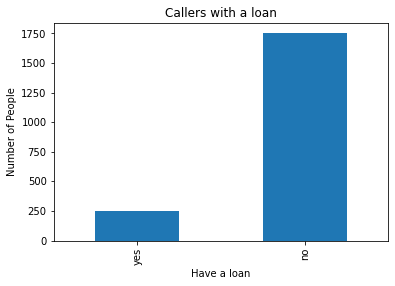

In [26]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Have a loan')
plt.ylabel('Number of People')
plt.title('Callers with a loan')
plt.show()

Loans can also be looked. we see that most of the callers did not have a loan taken out.

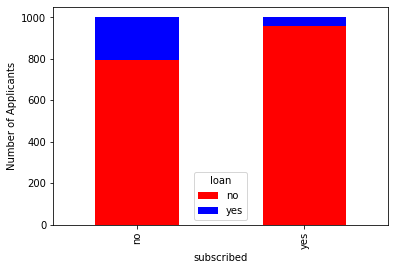

In [29]:
crosstab_CL = pd.crosstab(df['subscribed'], df['loan'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Callers')
plt.show()

In this graph I try to show if people without a loan subscribe more than people with a loan

On its examination we can see that the large majority of people with a loan did not subscribe.

Maybe a loan can have an effect on subsription rate.

# Conclussion

From the examination of all the data I belive that age, education and loan have an effect on wether people take out loans or not.